## Forecasting Food Price Volatility Using Time Series Models


## Step 1: Data Preparation & Exploration


### 1.1 Import necessary libraries


In [166]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Set style for plots
# plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]



### 1.2 Load the dataset


In [167]:
# Load the dataset
df = pd.read_csv('foodprice_data.csv')

# Display basic info
df.head()


,Products,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,...,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01
0,"Beef stewing cuts, per kilogram 4",12.66,13.12,13.51,13.29,14.08,14.10,14.44,14.35,13.62,...,20.39,20.48,20.33,21.08,20.10,18.65,19.08,20.58,18.01,19.69
1,"Beef striploin cuts, per kilogram 4",21.94,22.51,23.23,19.59,23.04,23.34,23.83,20.63,23.23,...,28.31,26.93,29.18,29.42,32.04,25.24,27.65,24.44,27.80,28.05
2,"Beef top sirloin cuts, per kilogram 4",13.44,12.80,13.96,12.40,16.91,15.70,15.69,15.80,15.09,...,23.88,23.68,24.80,23.24,24.16,24.41,19.62,19.59,23.19,22.79
3,"Beef rib cuts, per kilogram 4",20.17,20.13,22.95,17.47,18.80,21.36,21.17,21.30,20.40,...,29.02,28.90,32.71,29.26,35.16,26.55,33.78,25.20,28.95,32.79
4,"Ground beef, per kilogram 4",9.12,9.48,9.34,9.79,9.47,9.18,10.03,9.79,9.61,...,12.55,12.68,12.78,13.60,12.96,13.46,13.03,14.25,13.08,13.91


### 1.3 Data Cleaning


In [269]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     106 non-null    object 
 1   2017-01-01  106 non-null    float64
 2   2017-02-01  106 non-null    float64
 3   2017-03-01  106 non-null    float64
 4   2017-04-01  106 non-null    float64
 5   2017-05-01  106 non-null    float64
 6   2017-06-01  106 non-null    float64
 7   2017-07-01  106 non-null    float64
 8   2017-08-01  106 non-null    float64
 9   2017-09-01  106 non-null    float64
 10  2017-10-01  106 non-null    float64
 11  2017-11-01  106 non-null    float64
 12  2017-12-01  106 non-null    float64
 13  2018-01-01  106 non-null    float64
 14  2018-02-01  106 non-null    float64
 15  2018-03-01  106 non-null    float64
 16  2018-04-01  106 non-null    float64
 17  2018-05-01  106 non-null    float64
 18  2018-06-01  106 non-null    float64
 19  2018-07-01  106 non-null    f

In [169]:
# Set 'Products' as index
df = df.set_index('Products')

# Transpose
df = df.T

# Convert index to datetime
df.index = pd.to_datetime(df.index)

df.head()


Products,"Beef stewing cuts, per kilogram 4","Beef striploin cuts, per kilogram 4","Beef top sirloin cuts, per kilogram 4","Beef rib cuts, per kilogram 4","Ground beef, per kilogram 4","Pork loin cuts, per kilogram 4","Pork rib cuts, per kilogram 4","Pork shoulder cuts, per kilogram 4","Whole chicken, per kilogram 4","Chicken breasts, per kilogram 4",...,"Dried lentils, 900 grams 5","Dry beans and legumes, 900 grams 5","Tofu, 350 grams 5","Hummus, 227 grams 5","Salsa, 418 millilitres 5","Pasta sauce, 650 millilitres 5","Salad dressing, 475 millilitres 5","Almonds, 200 grams 5","Peanuts, 450 grams 5","Sunflower seeds, 400 grams 5"
2017-01-01,12.66,21.94,13.44,20.17,9.12,7.34,7.37,4.76,5.15,11.38,...,2.87,2.63,2.07,3.41,3.14,2.07,2.39,3.74,3.49,3.80
2017-02-01,13.12,22.51,12.80,20.13,9.48,7.16,7.28,5.41,4.99,11.22,...,2.97,2.72,2.05,3.29,3.04,2.02,2.44,4.45,3.53,3.78
2017-03-01,13.51,23.23,13.96,22.95,9.34,7.26,7.31,5.70,5.45,11.19,...,2.99,2.75,2.05,3.36,3.09,1.96,2.39,4.57,3.52,3.81
2017-04-01,13.29,19.59,12.40,17.47,9.79,7.88,7.77,6.21,5.59,11.37,...,3.11,2.85,1.99,3.30,3.19,2.15,2.44,4.42,3.44,3.74
2017-05-01,14.08,23.04,16.91,18.80,9.47,8.79,8.30,6.90,5.14,11.57,...,3.12,2.88,1.98,3.39,3.14,2.11,2.36,4.32,3.37,3.66


In [170]:
# Check for missing values
df.isnull().sum()

Products
Beef stewing cuts, per kilogram 4        0
Beef striploin cuts, per kilogram 4      0
Beef top sirloin cuts, per kilogram 4    0
Beef rib cuts, per kilogram 4            0
Ground beef, per kilogram 4              0
                                        ..
Pasta sauce, 650 millilitres 5           0
Salad dressing, 475 millilitres 5        0
Almonds, 200 grams 5                     0
Peanuts, 450 grams 5                     0
Sunflower seeds, 400 grams  5            0
Length: 106, dtype: int64

## Step 2: Trend & Seasonality Analysis


### 2.1 Visualizing Price Trends


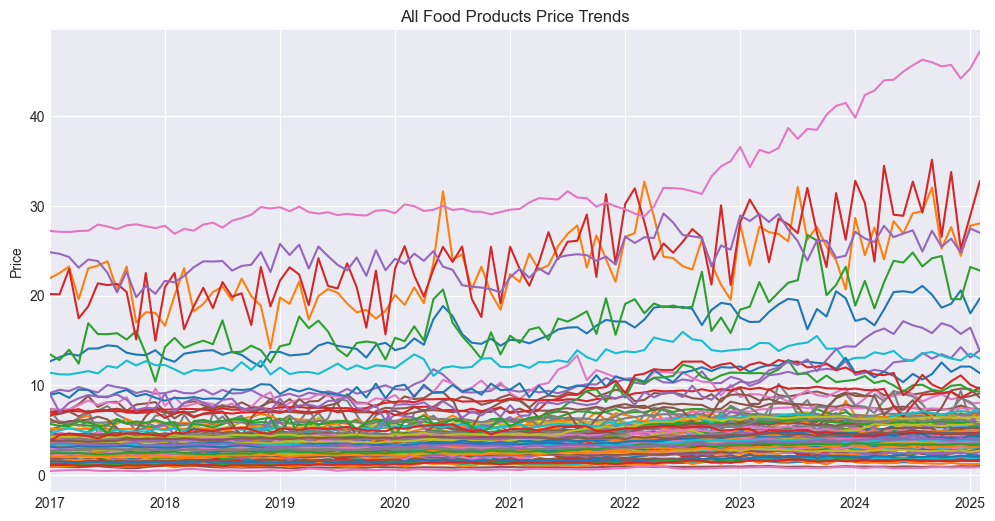

In [172]:
df.plot(title='All Food Products Price Trends', legend=False, figsize=(12, 6))
plt.ylabel('Price')
plt.show()


### 2.2 Category-wise Average Prices


In [173]:
# Define Categories
categories = {
    'Meat': [
        'Beef stewing cuts, per kilogram 4',
        'Ground beef, per kilogram 4',
        'Pork loin cuts, per kilogram 4'
    ],
    'Dairy': [
        'Milk, 1 litre 4',
        'Butter, 454 grams 4',
        'Block cheese, 500 grams 5'
    ],
    'Produce': [
        'Apples, per kilogram 4',
        'Tomatoes, per kilogram 4',
        'Potatoes, per kilogram 4'
    ]
}

# Prepare new dataframe for categories
category_df = pd.DataFrame()

for category, products in categories.items():
    available_products = [p for p in products if p in df.columns]
    if available_products:
        category_df[category] = df[available_products].mean(axis=1)

category_df.head()


,Meat,Dairy,Produce
2017-01-01,9.706667,4.030000,3.740000
2017-02-01,9.920000,4.143333,3.650000
2017-03-01,10.036667,4.196667,3.540000
2017-04-01,10.320000,4.000000,3.430000
2017-05-01,10.780000,4.210000,3.383333


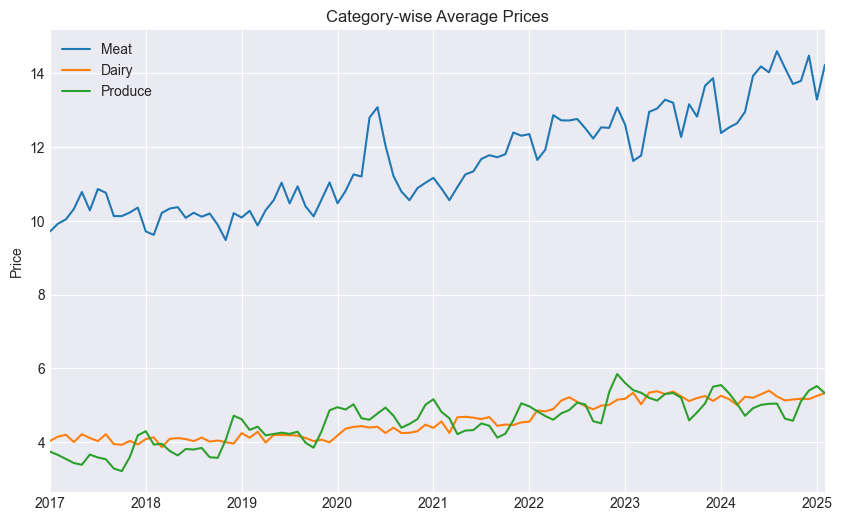

In [174]:
category_df.plot(title='Category-wise Average Prices', figsize=(10,6))
plt.ylabel('Price')
plt.show()


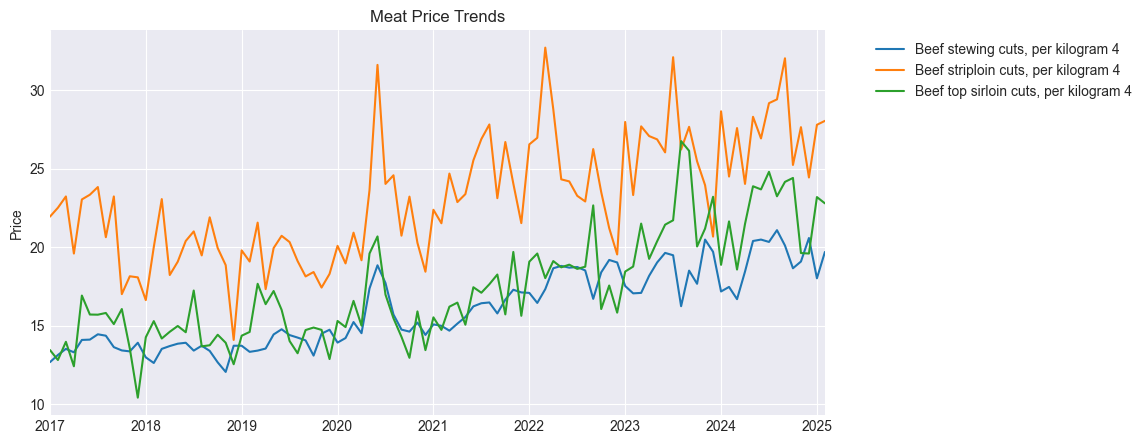

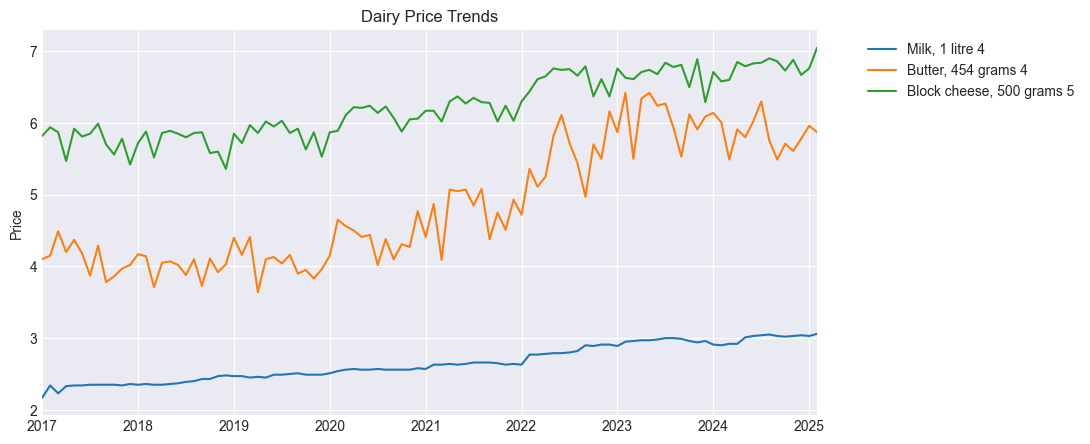

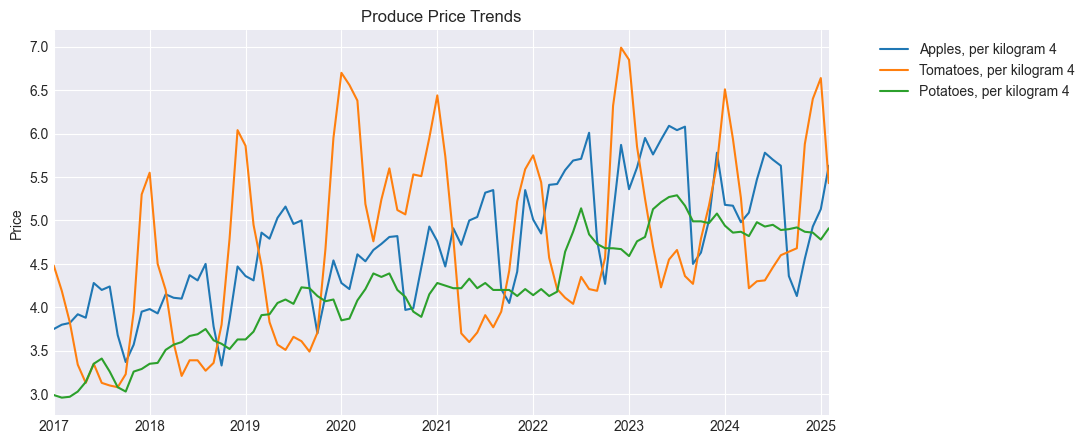

In [175]:
categories = {
    'Meat': [
        'Beef stewing cuts, per kilogram 4', 
        'Beef striploin cuts, per kilogram 4', 
        'Beef top sirloin cuts, per kilogram 4'
    ],
    'Dairy': [
        'Milk, 1 litre 4', 
        'Butter, 454 grams 4', 
        'Block cheese, 500 grams 5'
    ],
    'Produce': [
        'Apples, per kilogram 4', 
        'Tomatoes, per kilogram 4', 
        'Potatoes, per kilogram 4'
    ]
}

for category, products in categories.items():
    available_products = [p for p in products if p in df.columns]
    
    if available_products:
        df[available_products].plot(title=f'{category} Price Trends', figsize=(10, 5))
        plt.ylabel('Price')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
    else:
        print(f"No available products found for category: {category}")


### 2.3  Overall Average Price

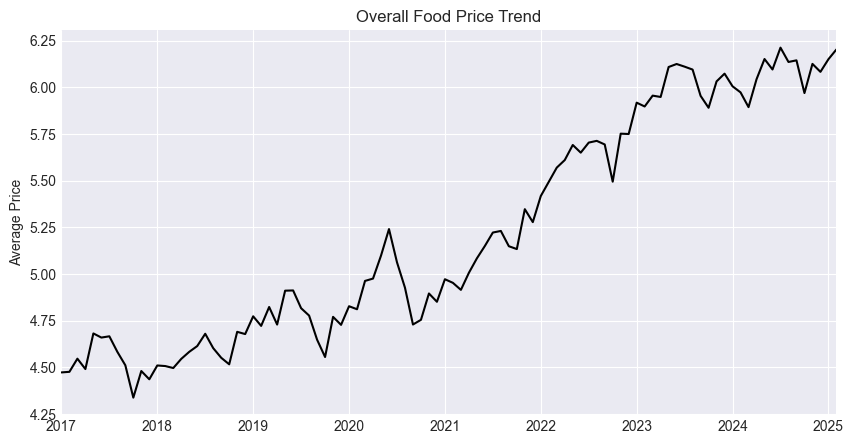

In [176]:
df['Overall Average'] = df.mean(axis=1)

df['Overall Average'].plot(title='Overall Food Price Trend', figsize=(10,5), color='black')
plt.ylabel('Average Price')
plt.show()


### STEP 3: Trend & Seasonality Analysis using Decomposition?


#### 3.1  Decompose Meat Category



Seasonal Analysis for Meat Category


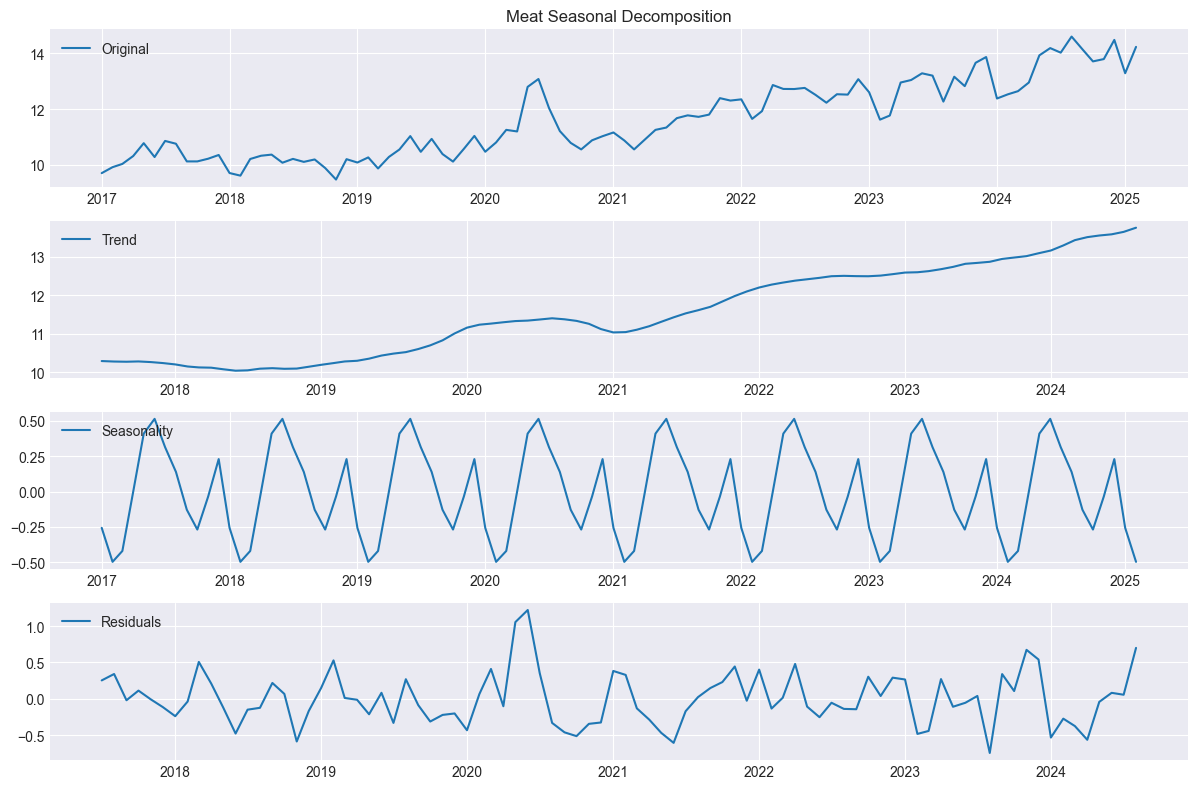


Meat Summary Statistics:
Original: count    98.000000
mean     11.617007
std       1.370062
min       9.476667
25%      10.360000
50%      11.256667
75%      12.722500
max      14.600000
Name: Meat, dtype: float64
Trend: count    86.000000
mean     11.549698
std       1.141926
min      10.040972
25%      10.312604
50%      11.340625
75%      12.513333
max      13.760556
Name: trend, dtype: float64
Seasonal: count    98.000000
mean     -0.007700
std       0.317642
min      -0.497678
25%      -0.265977
50%      -0.034821
75%       0.229881
max       0.514802
Name: seasonal, dtype: float64
Residuals: count    86.000000
mean      0.000575
std       0.362416
min      -0.742845
25%      -0.232962
50%      -0.030615
75%       0.248321
max       1.220893
Name: resid, dtype: float64


In [177]:
# Decompose Meat Category
print("\n" + "="*50)
print("Seasonal Analysis for Meat Category")
print("="*50)

# Perform decomposition for Meat
decomposition_meat = decompose_category(category_df['Meat'], 'Meat')

if decomposition_meat is not None:
    # Print summary statistics of the components
    print("\nMeat Summary Statistics:")
    print(f"Original: {category_df['Meat'].describe()}")
    print(f"Trend: {pd.Series(decomposition_meat.trend).describe()}")
    print(f"Seasonal: {pd.Series(decomposition_meat.seasonal).describe()}")
    print(f"Residuals: {pd.Series(decomposition_meat.resid).describe()}")


### 3.2 Decompose Dairy Category



Seasonal Analysis for Dairy Category


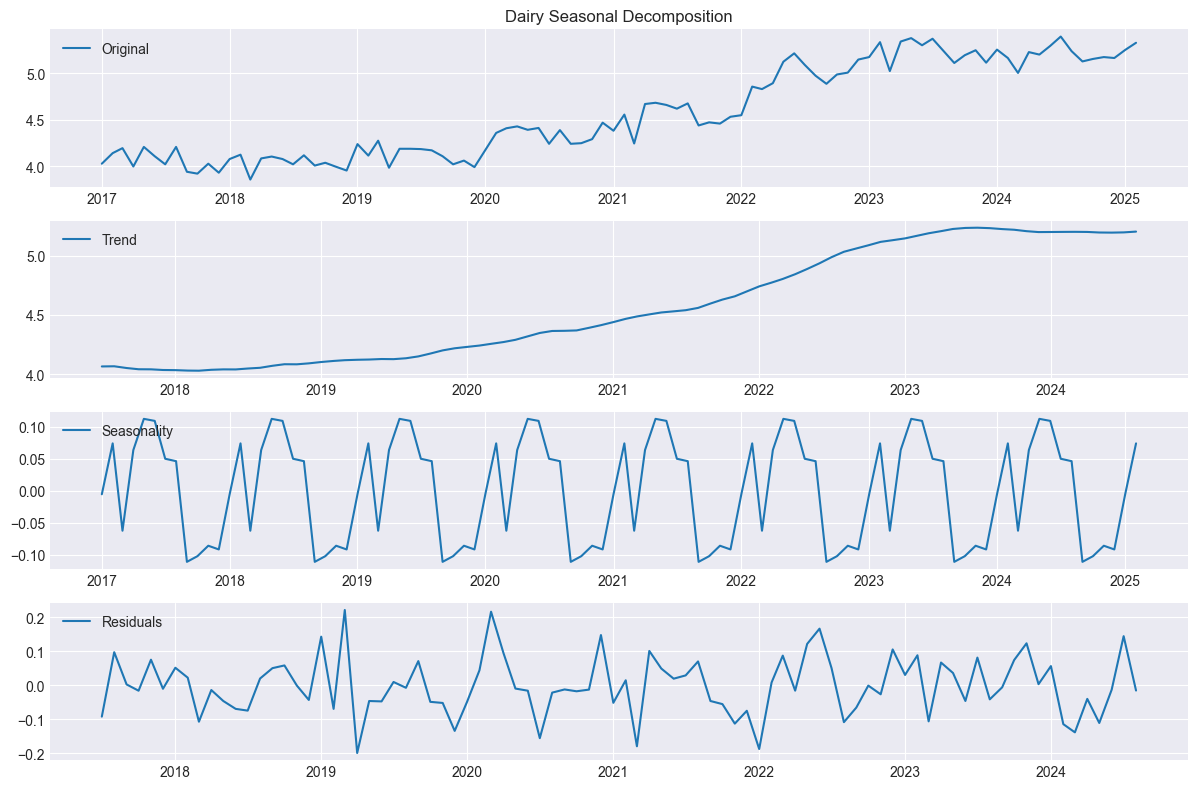


Dairy Summary Statistics:
Original: count    98.000000
mean      4.577619
std       0.492930
min       3.860000
25%       4.121667
50%       4.435000
75%       5.120833
max       5.393333
Name: Dairy, dtype: float64
Trend: count    86.000000
mean      4.566140
std       0.459728
min       4.028889
25%       4.121771
50%       4.453681
75%       5.111319
max       5.238333
Name: trend, dtype: float64
Seasonal: count    98.000000
mean      0.000705
std       0.082217
min      -0.110832
25%      -0.085653
50%       0.020657
75%       0.071733
max       0.112680
Name: seasonal, dtype: float64
Residuals: count    86.000000
mean     -0.000716
std       0.086214
min      -0.198533
25%      -0.048389
50%      -0.009783
75%       0.055252
max       0.221050
Name: resid, dtype: float64


In [178]:
# Decompose Dairy Category
print("\n" + "="*50)
print("Seasonal Analysis for Dairy Category")
print("="*50)

# Perform decomposition for Dairy
decomposition_dairy = decompose_category(category_df['Dairy'], 'Dairy')

if decomposition_dairy is not None:
    # Print summary statistics of the components
    print("\nDairy Summary Statistics:")
    print(f"Original: {category_df['Dairy'].describe()}")
    print(f"Trend: {pd.Series(decomposition_dairy.trend).describe()}")
    print(f"Seasonal: {pd.Series(decomposition_dairy.seasonal).describe()}")
    print(f"Residuals: {pd.Series(decomposition_dairy.resid).describe()}")


### 3.3 Decompose Produce Category



Seasonal Analysis for Produce Category


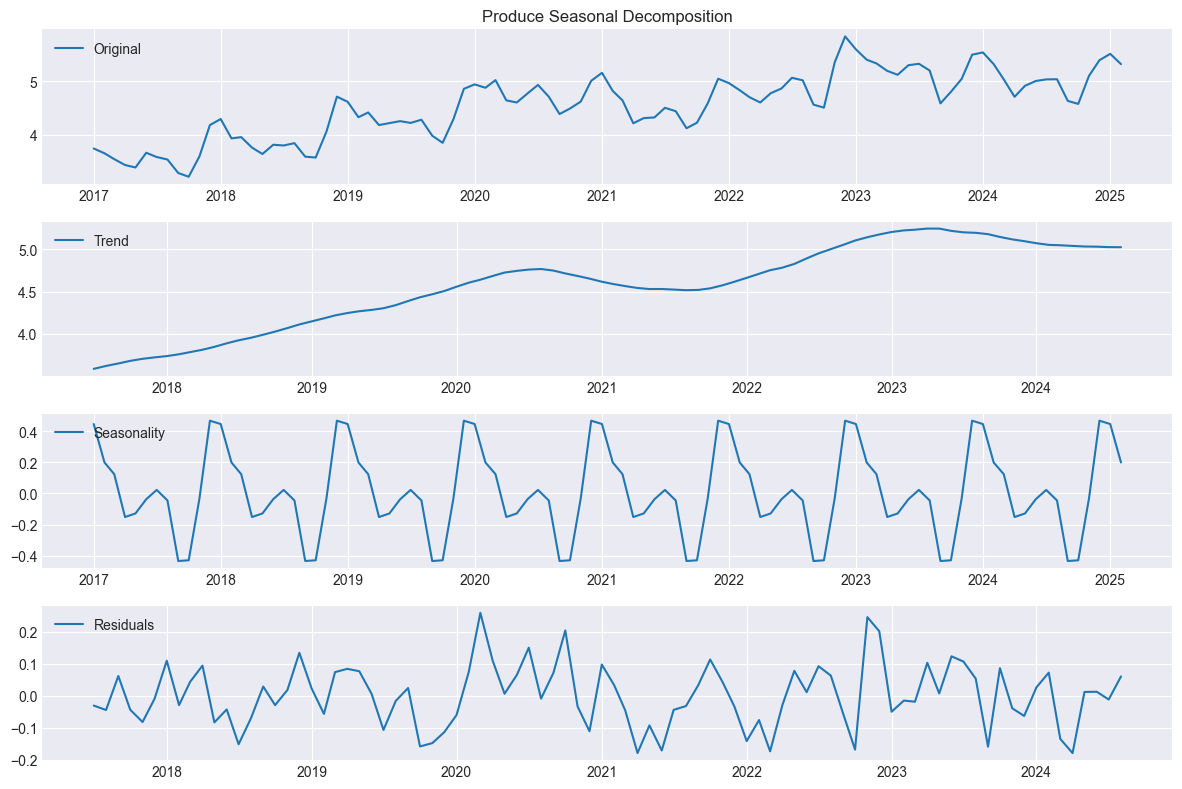


Produce Summary Statistics:
Original: count    98.000000
mean      4.544184
std       0.614634
min       3.210000
25%       4.180000
50%       4.610000
75%       5.022500
max       5.843333
Name: Produce, dtype: float64
Trend: count    86.000000
mean      4.573726
std       0.482240
min       3.588056
25%       4.252674
50%       4.617083
75%       5.029896
max       5.245139
Name: trend, dtype: float64
Seasonal: count    98.000000
mean      0.006568
std       0.274852
min      -0.433443
25%      -0.128522
50%      -0.031478
75%       0.198482
max       0.466617
Name: seasonal, dtype: float64
Residuals: count    86.000000
mean      0.000685
std       0.097951
min      -0.178879
25%      -0.056334
50%      -0.001386
75%       0.071964
max       0.258859
Name: resid, dtype: float64


In [179]:
# Decompose Produce Category
print("\n" + "="*50)
print("Seasonal Analysis for Produce Category")
print("="*50)

# Perform decomposition for Produce
decomposition_produce = decompose_category(category_df['Produce'], 'Produce')

if decomposition_produce is not None:
    # Print summary statistics of the components
    print("\nProduce Summary Statistics:")
    print(f"Original: {category_df['Produce'].describe()}")
    print(f"Trend: {pd.Series(decomposition_produce.trend).describe()}")
    print(f"Seasonal: {pd.Series(decomposition_produce.seasonal).describe()}")
    print(f"Residuals: {pd.Series(decomposition_produce.resid).describe()}")


### 3.4 Decompose Overall Average



Seasonal Analysis for Overall Average Category


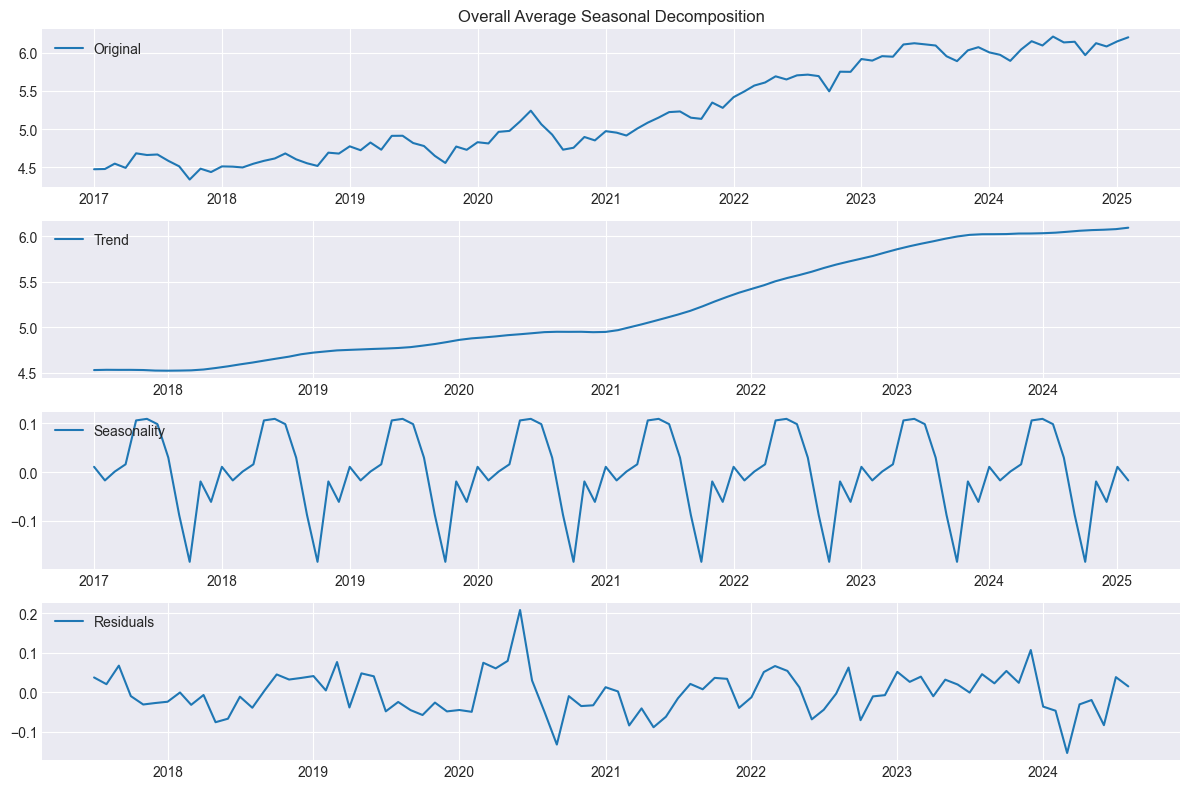


Overall Average Summary Statistics:
Original: count    98.000000
mean      5.223541
std       0.603275
min       4.337830
25%       4.683939
50%       5.034670
75%       5.893184
max       6.212736
Name: Overall Average, dtype: float64
Trend: count    86.000000
mean      5.208238
std       0.554407
min       4.523192
25%       4.752788
50%       4.958864
75%       5.773643
max       6.091254
Name: trend, dtype: float64
Seasonal: count    98.000000
mean     -0.000067
std       0.081668
min      -0.185038
25%      -0.019416
50%       0.005816
75%       0.029605
max       0.109570
Name: seasonal, dtype: float64
Residuals: count    86.000000
mean     -0.001560
std       0.054069
min      -0.153318
25%      -0.038741
50%      -0.004932
75%       0.036533
max       0.208197
Name: resid, dtype: float64


In [180]:
# Decompose Overall Average
print("\n" + "="*50)
print("Seasonal Analysis for Overall Average Category")
print("="*50)

# Perform decomposition for Overall Average
decomposition_overall = decompose_category(df['Overall Average'], 'Overall Average')

if decomposition_overall is not None:
    # Print summary statistics of the components
    print("\nOverall Average Summary Statistics:")
    print(f"Original: {df['Overall Average'].describe()}")
    print(f"Trend: {pd.Series(decomposition_overall.trend).describe()}")
    print(f"Seasonal: {pd.Series(decomposition_overall.seasonal).describe()}")
    print(f"Residuals: {pd.Series(decomposition_overall.resid).describe()}")


### 3.5 Check Stationarity for Each Category and Overall Average

In [181]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller Test and return result
def adf_test(series, category_name):
    print(f"ADF Test for {category_name}")
    result = adfuller(series.dropna())  # drop NaN values before test
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    
    if result[1] < 0.05:
        print(f"Conclusion: The {category_name} series is **stationary**.")
    else:
        print(f"Conclusion: The {category_name} series is **non-stationary**.")
    print("="*50)

# Perform stationarity check for each category
for category in category_df.columns:
    adf_test(category_df[category], category)

# Perform stationarity check for Overall Average
adf_test(df['Overall Average'], 'Overall Average')


ADF Test for Meat
ADF Statistic: 0.7468017416937784
p-value: 0.9907270608405446
Critical Values: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}
Conclusion: The Meat series is **non-stationary**.
ADF Test for Dairy
ADF Statistic: -0.12689929508307904
p-value: 0.9466924709183082
Critical Values: {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
Conclusion: The Dairy series is **non-stationary**.
ADF Test for Produce
ADF Statistic: -1.4795450692914345
p-value: 0.5436047466515421
Critical Values: {'1%': -3.5097356063504983, '5%': -2.8961947486260944, '10%': -2.5852576124567475}
Conclusion: The Produce series is **non-stationary**.
ADF Test for Overall Average
ADF Statistic: -0.12183937684113427
p-value: 0.9472193310545456
Critical Values: {'1%': -3.5097356063504983, '5%': -2.8961947486260944, '10%': -2.5852576124567475}
Conclusion: The Overall Average series is **non-stationary**.


ADF Test Results:

| Series           | ADF Statistic | p-value  | Conclusion        |
|-----------------|----------------|----------|------------------|
| Meat            | 0.7468         | 0.9907   | Non-Stationary   |
| Dairy           | -0.1269        | 0.9467   | Non-Stationary   |
| Produce         | -1.4795        | 0.5436   | Non-Stationary   |
| Overall Average | -0.1218        | 0.9472   | Non-Stationary   |



### 3.6 Differencing to Make Data Stationary

#### 3.6.1  Meat Differencing

ADF Test for Meat (1st Difference)
ADF Statistic: -5.2777243679986805
p-value: 6.0884215844860304e-06
Critical Values: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}
Conclusion: The Meat (1st Difference) series is **stationary**.


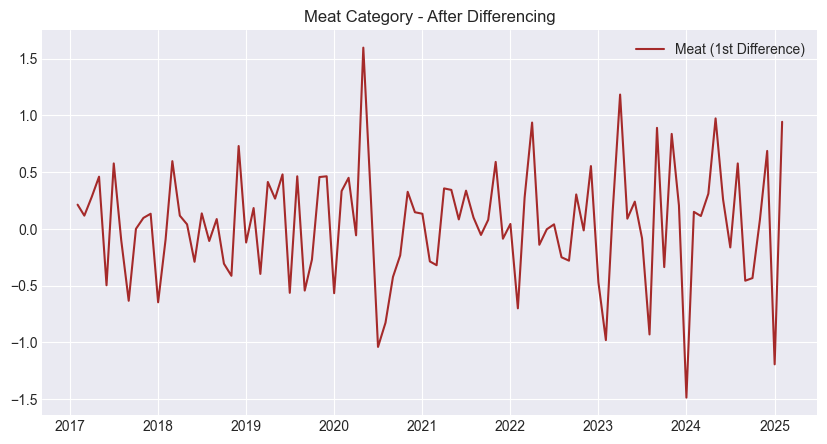

In [182]:
# Meat Differencing
meat_diff = category_df['Meat'].diff().dropna()

# ADF Test after Differencing
adf_test(meat_diff, 'Meat (1st Difference)')

# Plot
plt.figure(figsize=(10,5))
plt.plot(meat_diff, label='Meat (1st Difference)', color='brown')
plt.title('Meat Category - After Differencing')
plt.legend()
plt.show()


###  3.6.2 Dairy Differencing


ADF Test for Dairy (1st Difference)
ADF Statistic: -6.515756221205135
p-value: 1.0724118400085375e-08
Critical Values: {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
Conclusion: The Dairy (1st Difference) series is **stationary**.


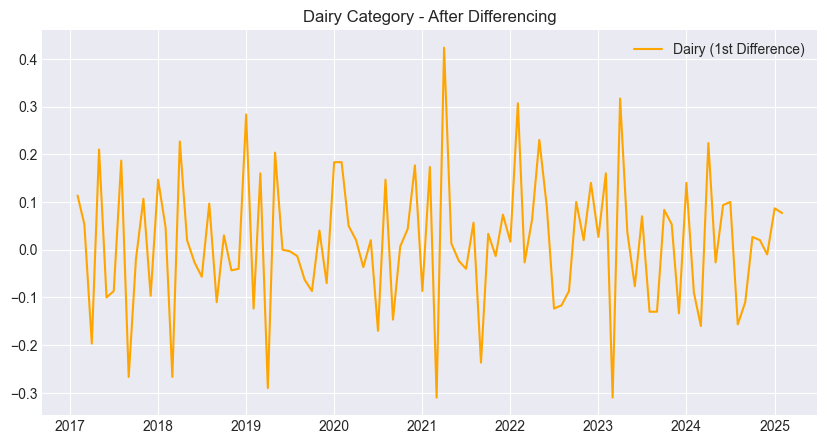

In [183]:
# Dairy Differencing
dairy_diff = category_df['Dairy'].diff().dropna()

# ADF Test after Differencing
adf_test(dairy_diff, 'Dairy (1st Difference)')

# Plot
plt.figure(figsize=(10,5))
plt.plot(dairy_diff, label='Dairy (1st Difference)', color='orange')
plt.title('Dairy Category - After Differencing')
plt.legend()
plt.show()


### 3.6.3 Produce Differencing

ADF Test for Produce (1st Difference)
ADF Statistic: -1.831325120893584
p-value: 0.36502424092280866
Critical Values: {'1%': -3.510711795769895, '5%': -2.8966159448223734, '10%': -2.5854823866213152}
Conclusion: The Produce (1st Difference) series is **non-stationary**.


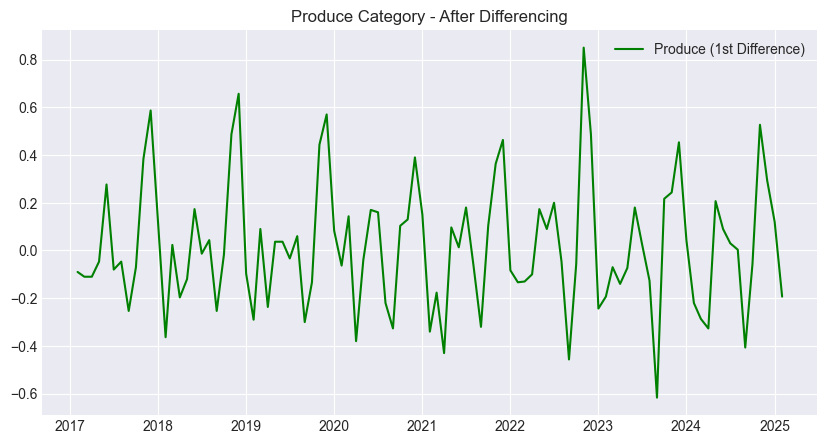

In [184]:
# Produce Differencing
produce_diff = category_df['Produce'].diff().dropna()

# ADF Test after Differencing
adf_test(produce_diff, 'Produce (1st Difference)')

# Plot
plt.figure(figsize=(10,5))
plt.plot(produce_diff, label='Produce (1st Difference)', color='green')
plt.title('Produce Category - After Differencing')
plt.legend()
plt.show()


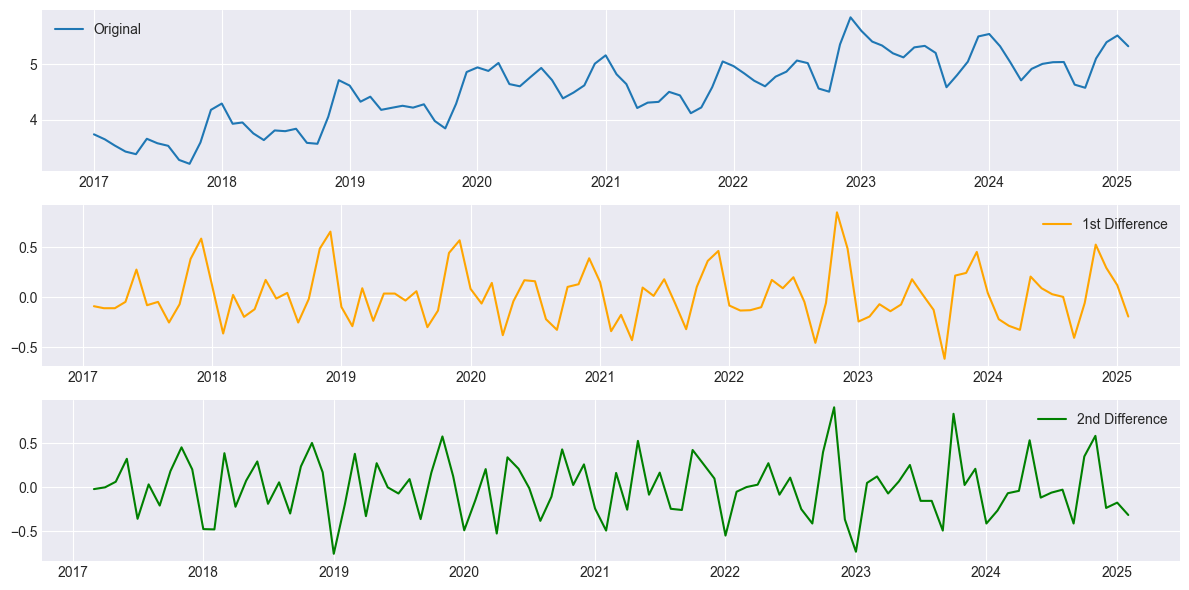

ADF Statistic: -8.733386484569861
p-value: 3.147322201646566e-14
Critical Values: {'1%': -3.510711795769895, '5%': -2.8966159448223734, '10%': -2.5854823866213152}
Conclusion: The Produce (2nd Difference) series is **stationary**.


In [185]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 2nd Differencing
produce_diff2 = category_df['Produce'].diff().diff().dropna()

# Plot Original vs 1st vs 2nd Difference
plt.figure(figsize=(12,6))

plt.subplot(311)
plt.plot(category_df['Produce'], label='Original')
plt.legend()

plt.subplot(312)
plt.plot(category_df['Produce'].diff().dropna(), label='1st Difference', color='orange')
plt.legend()

plt.subplot(313)
plt.plot(produce_diff2, label='2nd Difference', color='green')
plt.legend()

plt.tight_layout()
plt.show()

# ADF Test for 2nd Difference
adf_result = adfuller(produce_diff2)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

if adf_result[1] <= 0.05:
    print("Conclusion: The Produce (2nd Difference) series is **stationary**.")
else:
    print("Conclusion: The Produce (2nd Difference) series is **non-stationary**.")


### 3.6.4 Overall Average Differencing

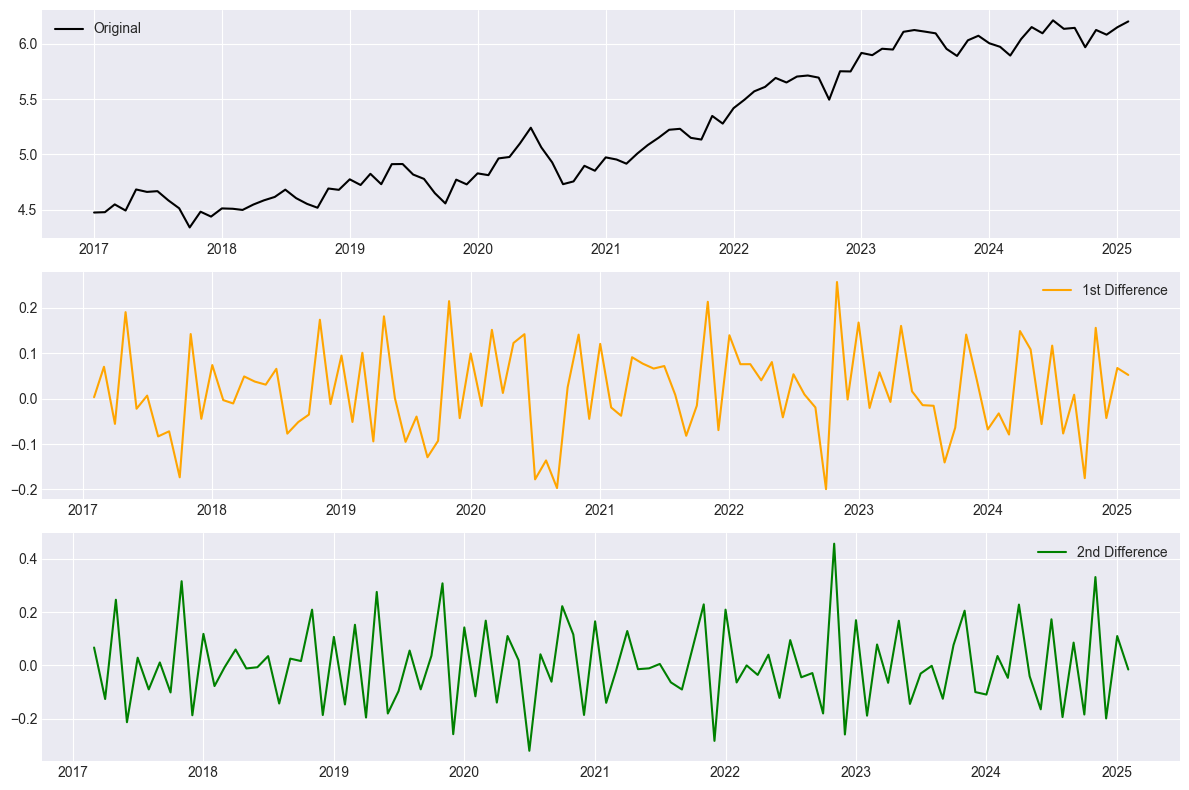

ADF Statistic: -7.2743127450302625
p-value: 1.5588348459924588e-10
Critical Values: {'1%': -3.510711795769895, '5%': -2.8966159448223734, '10%': -2.5854823866213152}
Conclusion: The Overall Average (2nd Difference) series is **stationary**.


In [186]:
# 2nd Differencing
overall_avg_diff2 = df['Overall Average'].diff().diff().dropna()

# Plot Original, 1st Difference, and 2nd Difference
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.plot(df['Overall Average'], label='Original', color='black')
plt.legend()

plt.subplot(312)
plt.plot(df['Overall Average'].diff().dropna(), label='1st Difference', color='orange')
plt.legend()

plt.subplot(313)
plt.plot(overall_avg_diff2, label='2nd Difference', color='green')
plt.legend()

plt.tight_layout()
plt.show()

# ADF Test for 2nd Difference
from statsmodels.tsa.stattools import adfuller

adf_result2 = adfuller(overall_avg_diff2)

print("ADF Statistic:", adf_result2[0])
print("p-value:", adf_result2[1])
print("Critical Values:", adf_result2[4])

if adf_result2[1] <= 0.05:
    print("Conclusion: The Overall Average (2nd Difference) series is **stationary**.")
else:
    print("Conclusion: The Overall Average (2nd Difference) series is **non-stationary**.")


## Step 4: Forecasting Models Implementation


In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Set visual style
plt.style.use('seaborn-v0_8-darkgrid')

# Ensure DateTime Index
df.index = pd.to_datetime(df.index)

# Set Monthly Start Frequency
df = df.asfreq('MS')

In [188]:
train = df['Overall Average'][:-24]
test = df['Overall Average'][-24:]


### 4.1  Moving Average


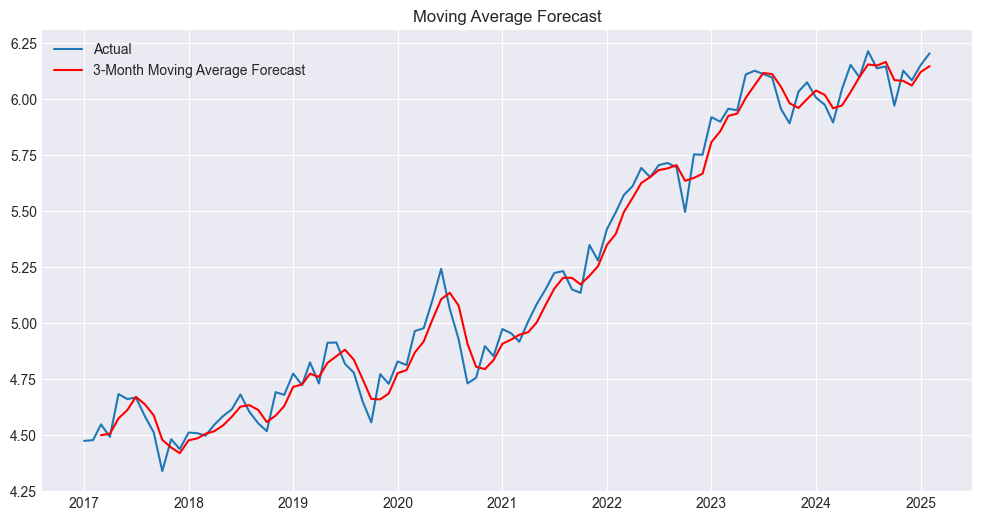

Mean Squared Error (MSE): 0.004018496598235785
Mean Absolute Error (MAE): 0.052887840670859276
Root Mean Squared Error (RMSE): 0.06339161299600905


In [208]:
# Define the window size
window_size = 3

# Generate the Moving Average forecast
df['Moving_Avg_Forecast'] = df['Overall Average'].rolling(window=window_size).mean()

# Plotting the forecast vs actual values
plt.figure(figsize=(12,6))
plt.plot(df['Overall Average'], label='Actual')
plt.plot(df['Moving_Avg_Forecast'], label=f'{window_size}-Month Moving Average Forecast', color='red')
plt.legend()
plt.title('Moving Average Forecast')
plt.show()

# Evaluate the forecast performance using MSE, MAE, and RMSE
# Ensure the test set aligns with the forecast
forecast_values = df['Moving_Avg_Forecast'][-24:]

# Compute the evaluation metrics
mse_ma = mean_squared_error(test, forecast_values)
mae_ma = mean_absolute_error(test, forecast_values)
rmse_ma = np.sqrt(mse)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


### 4.2. Exponential Smoothing Forecast for Overall Average

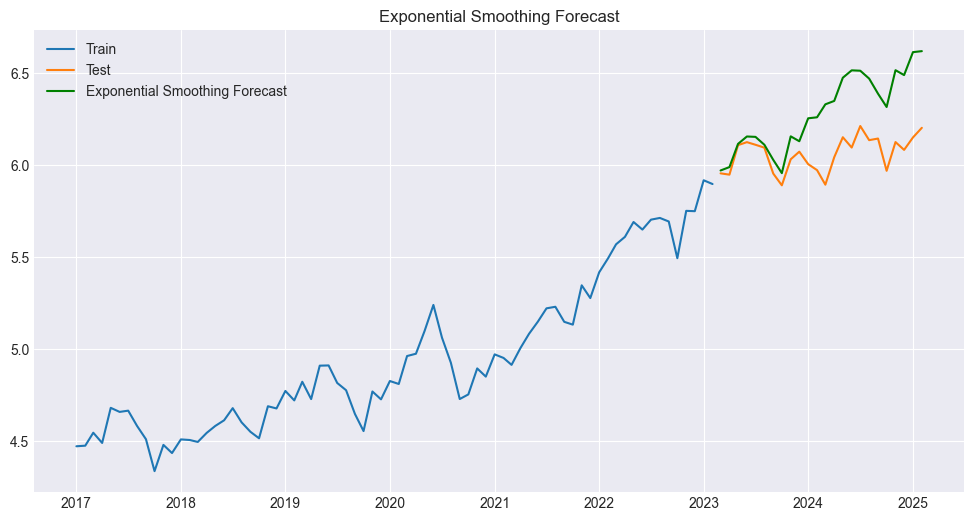

In [191]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
es_forecast = model_es.forecast(len(test))

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(es_forecast, label='Exponential Smoothing Forecast', color='green')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.show()


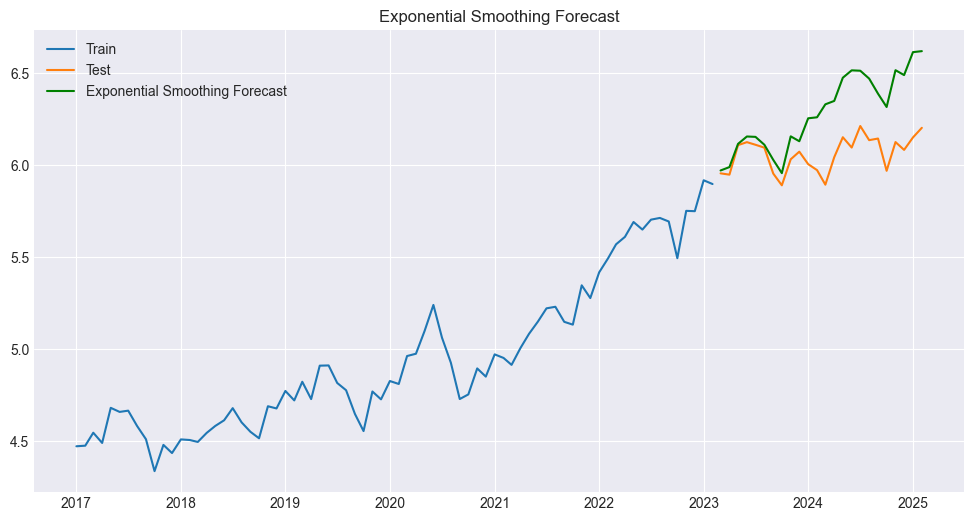

Mean Squared Error (MSE): 0.07625645123402852
Mean Absolute Error (MAE): 0.22491360978780928
Root Mean Squared Error (RMSE): 0.2761457065283263


In [192]:
# Fit the Exponential Smoothing model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
es_forecast = model_es.forecast(len(test))

# Plotting the forecast vs actual values
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(es_forecast, label='Exponential Smoothing Forecast', color='green')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.show()

# Evaluate the forecast performance using MSE, MAE, and RMSE
mse_es = mean_squared_error(test, es_forecast)
mae_es = mean_absolute_error(test, es_forecast)
rmse_es = np.sqrt(mse_es)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse_es}')
print(f'Mean Absolute Error (MAE): {mae_es}')
print(f'Root Mean Squared Error (RMSE): {rmse_es}')


### 4.3. ARIMA Model for Overall Average



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-153.554, Time=2.72 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-123.867, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-150.146, Time=0.88 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-140.303, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-123.180, Time=0.09 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-145.071, Time=5.52 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-151.365, Time=5.19 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-150.485, Time=4.05 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-141.277, Time=4.02 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-146.791, Time=5.28 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.14 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : 

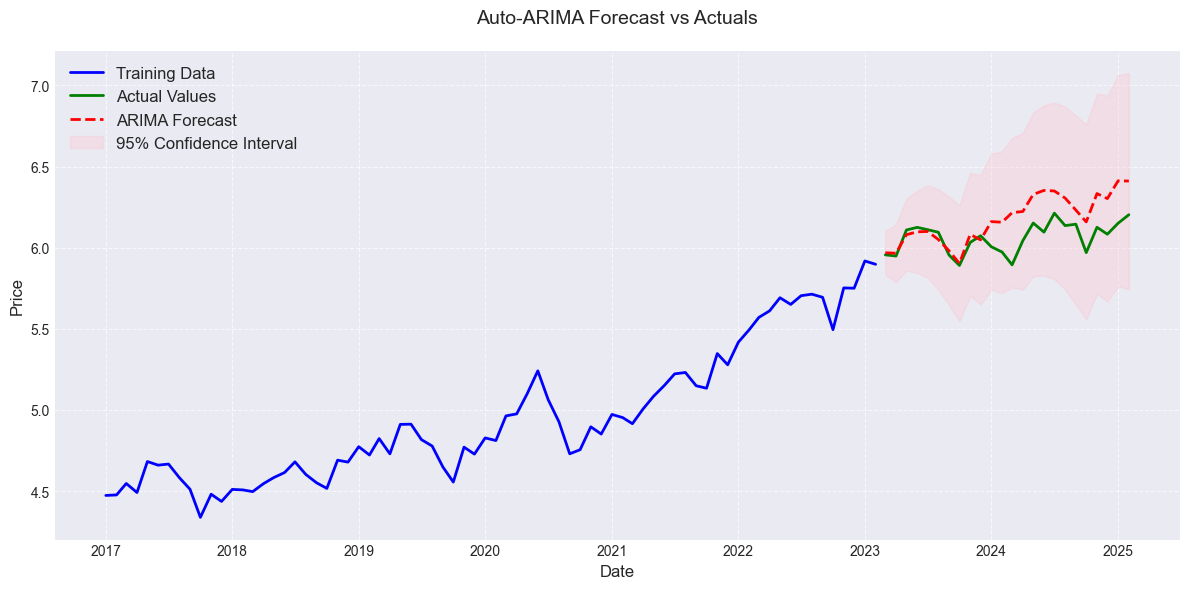

In [135]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# 1. Run Auto-ARIMA with optimized settings
auto_arima_model = auto_arima(
    train,
    seasonal=True,       # For seasonal data
    m=12,               # Monthly seasonality
    stepwise=True,      # Faster computation (but can't be parallelized)
    trace=True,         # Show progress
    suppress_warnings=True,
    error_action='ignore',
    test='adf',         # Use ADF test for stationarity
    n_jobs=1,           # Must be 1 when stepwise=True
    random_state=42,     # For reproducibility
    with_intercept=True  # Let model decide about intercept
)

print(auto_arima_model.summary())

# 2. Forecast
arima_forecast, conf_int = auto_arima_model.predict(
    n_periods=len(test),
    return_conf_int=True
)

# 3. Enhanced Plotting with more customization
plt.figure(figsize=(12,6))
plt.plot(train, label='Training Data', color='blue', linewidth=2)
plt.plot(test, label='Actual Values', color='green', linewidth=2)
plt.plot(test.index, arima_forecast, 
         label='ARIMA Forecast', 
         color='red', 
         linestyle='--',
         linewidth=2)
plt.fill_between(test.index, 
                conf_int[:,0], 
                conf_int[:,1],
                color='pink', 
                alpha=0.3, 
                label='95% Confidence Interval')
plt.title('Auto-ARIMA Forecast vs Actuals', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


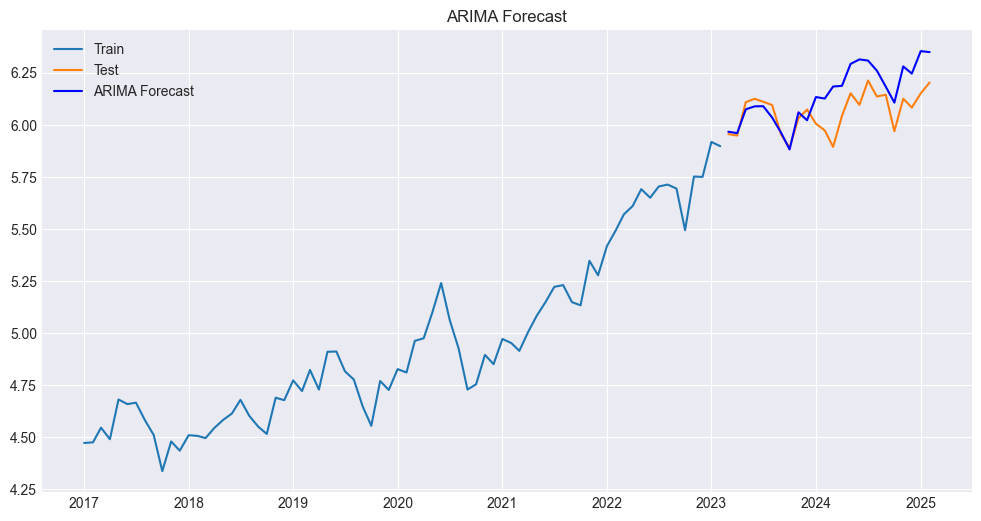

Mean Squared Error (MSE): 0.015860395944882238
Mean Absolute Error (MAE): 0.10035322359617527
Root Mean Squared Error (RMSE): 0.1259380639238282


In [193]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMA model (SARIMAX with the identified best parameters)
best_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model_fitted = best_model.fit()

# Forecast using the fitted model
arima_forecast = model_fitted.forecast(len(test))

# Plotting the forecast vs actual values
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(arima_forecast, label='ARIMA Forecast', color='blue')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

# Evaluate the forecast performance using MSE, MAE, and RMSE
mse_arima = mean_squared_error(test, arima_forecast)
mae_arima = mean_absolute_error(test, arima_forecast)
rmse_arima = np.sqrt(mse_arima)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse_arima}')
print(f'Mean Absolute Error (MAE): {mae_arima}')
print(f'Root Mean Squared Error (RMSE): {rmse_arima}')


### 4.4. SARIMA Model for Overall Average

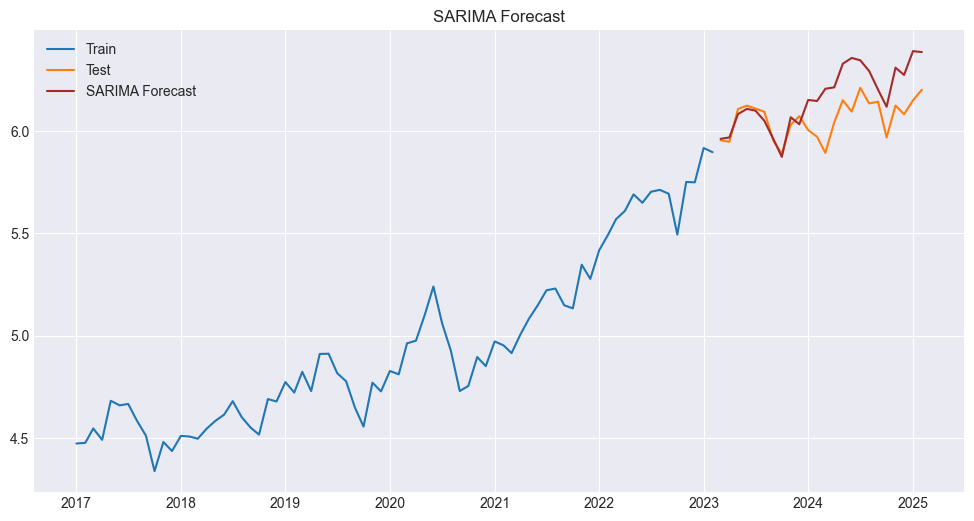

In [136]:
# ==============================
# MODEL 5: SARIMA
# ==============================

from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
sarima_forecast = model_sarima.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='brown')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()


C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


MAE : 0.06157228928754902
RMSE: 0.07639357978530778
R²  : 0.3015099085895645


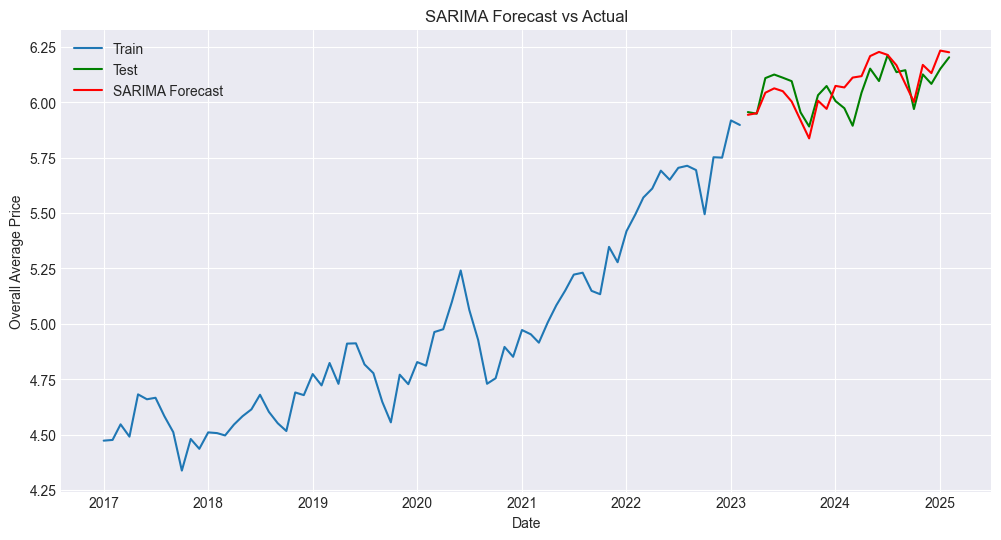

In [156]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fit SARIMA Model
model = SARIMAX(train, order=(1,0,0), seasonal_order=(1,0,1,12))
sarima_fit = model.fit(disp=False)

# Predictions
pred = sarima_fit.predict(start=test.index[0], end=test.index[-1])

# Evaluation Metrics
mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))

print(f'MAE : {mae}')
print(f'RMSE: {rmse}')

# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='green')
plt.plot(pred, label='SARIMA Forecast', color='red')
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Overall Average Price')
plt.grid(True)
plt.show()


In [160]:
from pmdarima import auto_arima

# Auto-tune SARIMA parameters
auto_model = auto_arima(
    train,
    seasonal=True,
    m=12,               # Monthly seasonality
    stepwise=True,
    trace=True,
    suppress_warnings=True,
    error_action='ignore',
    test='adf',
    n_jobs=1
)

print(auto_model.summary())
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-153.554, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-123.867, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-150.146, Time=0.62 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-140.303, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-123.180, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-145.071, Time=2.16 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-151.365, Time=7.41 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-150.485, Time=6.32 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-141.277, Time=4.73 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-146.791, Time=4.16 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.19 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.83 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : 

C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


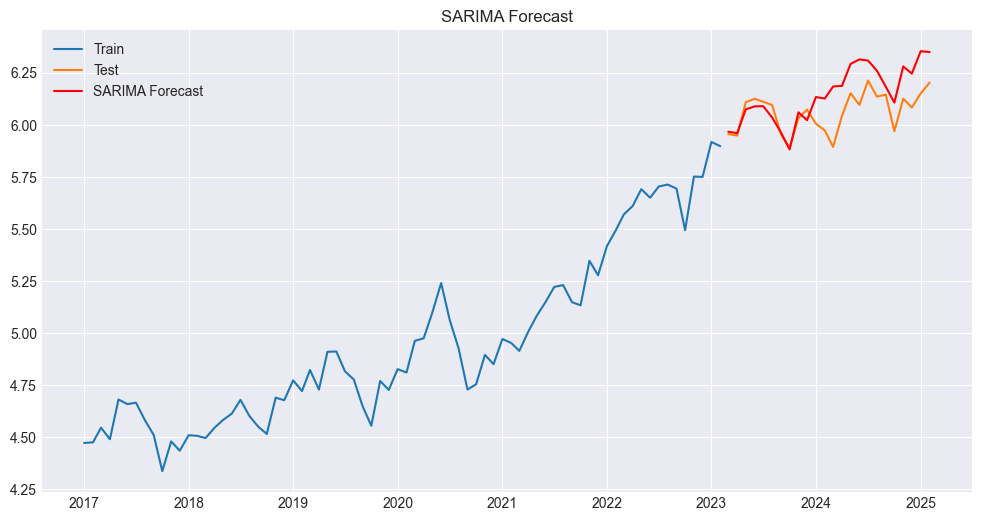

Mean Squared Error (MSE): 0.015860395944882238
Mean Absolute Error (MAE): 0.10035322359617527
Root Mean Squared Error (RMSE): 0.1259380639238282


In [194]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model (SARIMAX with the identified best parameters)
best_sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
sarima_fitted = best_sarima_model.fit()

# Forecast using the fitted model
sarima_forecast = sarima_fitted.forecast(len(test))

# Plotting the forecast vs actual values
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(sarima_forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

# Evaluate the forecast performance using MSE, MAE, and RMSE
mse_sarima = mean_squared_error(test, sarima_forecast)
mae_sarima = mean_absolute_error(test, sarima_forecast)
rmse_sarima = np.sqrt(mse_sarima)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse_sarima}')
print(f'Mean Absolute Error (MAE): {mae_sarima}')
print(f'Root Mean Squared Error (RMSE): {rmse_sarima}')


### 4.5. Prophet Model for Overall Average

13:46:37 - cmdstanpy - INFO - Chain [1] start processing
13:46:39 - cmdstanpy - INFO - Chain [1] done processing


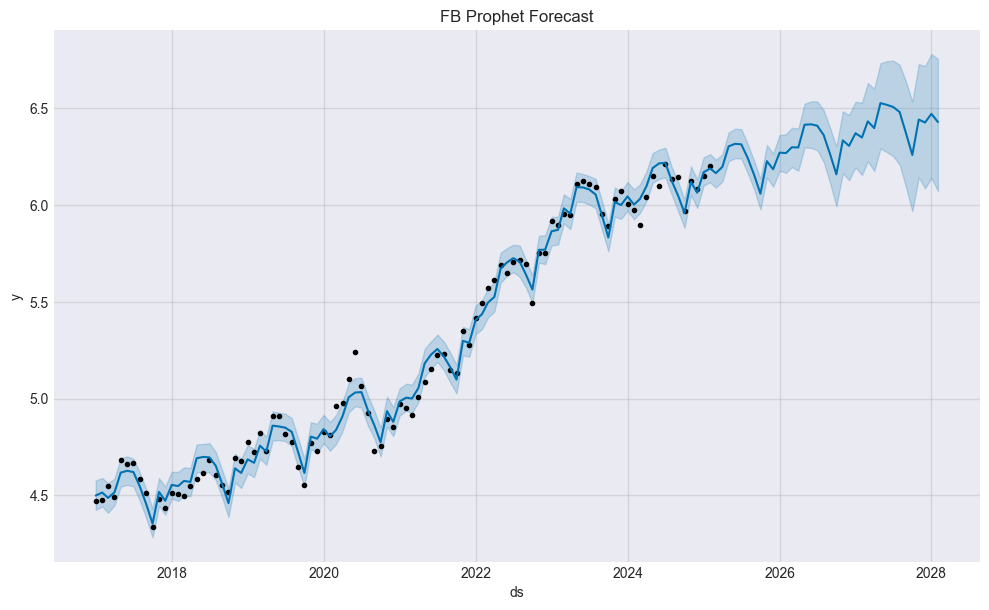

In [138]:
# ==============================
# MODEL 6: FB PROPHET
# ==============================

from prophet import Prophet

df_prophet = df['Overall Average'].reset_index()
df_prophet.columns = ['ds', 'y']

model_prophet = Prophet()
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=36, freq='MS')
forecast_prophet = model_prophet.predict(future)

fig = model_prophet.plot(forecast_prophet)
plt.title('FB Prophet Forecast')
plt.show()


15:25:00 - cmdstanpy - INFO - Chain [1] start processing
15:25:01 - cmdstanpy - INFO - Chain [1] done processing



=== Prophet Model Evaluation ===
MSE: 0.1008
MAE: 0.2271
RMSE: 0.3175


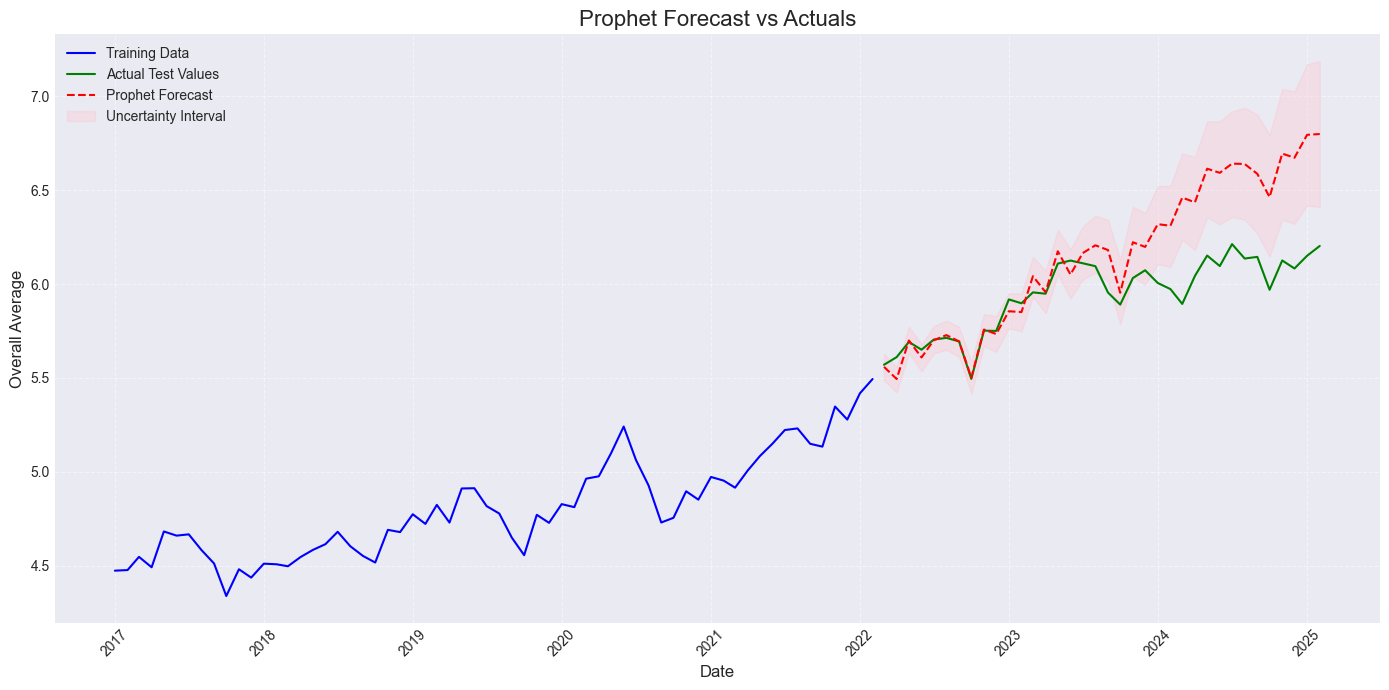

In [207]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for Prophet
df_prophet = df[['Overall Average']].reset_index()
df_prophet.columns = ['ds', 'y']

# Split into train and test (last 36 periods as test)
train_prophet = df_prophet[:-36]
test_prophet = df_prophet[-36:]

# Initialize and fit Prophet model with improved settings
model_prophet = Prophet(
    yearly_seasonality=True,  # Explicitly enable yearly seasonality
    weekly_seasonality=False,  # Disable if not relevant
    daily_seasonality=False,   # Disable if not relevant
    seasonality_mode='additive',  # Try 'multiplicative' if seasonality grows with trend
    changepoint_prior_scale=0.05,  # Adjust sensitivity to trend changes
    seasonality_prior_scale=10.0    # Adjust seasonality flexibility
)

# Add potential additional regressors if available
# model_prophet.add_regressor('additional_feature')

model_prophet.fit(train_prophet)

# Create future dataframe matching test period
future = model_prophet.make_future_dataframe(periods=36, freq='ME')  # Adjust frequency as needed

# Generate forecast
forecast_prophet = model_prophet.predict(future)

# Extract predictions for test period
predicted_values = forecast_prophet.tail(36)['yhat']

# Enhanced Evaluation Metrics
mse_prophet = mean_squared_error(test_prophet['y'], predicted_values)
mae_prophet = mean_absolute_error(test_prophet['y'], predicted_values)
rmse_prophet = np.sqrt(mse_prophet)
# mape_prophet = np.mean(np.abs((test_prophet['y'] - predicted_values) / test_prophet['y'])) * 100

print('\n=== Prophet Model Evaluation ===')
print(f'MSE: {mse_prophet:.4f}')
print(f'MAE: {mae_prophet:.4f}')
print(f'RMSE: {rmse_prophet:.4f}')
# print(f'MAPE: {mape_prophet:.2f}%')

# Enhanced Visualization
fig, ax = plt.subplots(figsize=(14, 7))

# Plot training data
ax.plot(train_prophet['ds'], train_prophet['y'], 'b-', label='Training Data')

# Plot test data
ax.plot(test_prophet['ds'], test_prophet['y'], 'g-', label='Actual Test Values')

# Plot predictions
ax.plot(test_prophet['ds'], predicted_values, 'r--', label='Prophet Forecast')

# Add uncertainty interval
ax.fill_between(test_prophet['ds'],
               forecast_prophet.tail(36)['yhat_lower'],
               forecast_prophet.tail(36)['yhat_upper'],
               color='pink', alpha=0.3, label='Uncertainty Interval')

# Formatting
ax.set_title('Prophet Forecast vs Actuals', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Overall Average', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# # Component analysis
# fig2 = model_prophet.plot_components(forecast_prophet)
# plt.tight_layout()
# plt.show()

### 4.6 EVALUATION


In [211]:
import pandas as pd

# Create a DataFrame with the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Moving Average', 'Exponential Smoothing', 'ARIMA', 'SARIMA', 'Prophet'],
    'MSE': [mse_ma, mse_es, mse_arima, mse_sarima, mse_prophet],
    'MAE': [mae_ma, mae_es, mae_arima, mae_sarima, mae_prophet],
    'RMSE': [rmse_ma, rmse_es, rmse_arima, rmse_sarima, rmse_prophet]
})

# Sort by MSE
metrics_df = metrics_df.sort_values(by='MSE', ascending=True).reset_index(drop=True)

# Display the result
metrics_df


,Model,MSE,MAE,RMSE
0,Moving Average,0.004018,0.052888,0.063392
1,ARIMA,0.015860,0.100353,0.125938
2,SARIMA,0.015860,0.100353,0.125938
3,Exponential Smoothing,0.076256,0.224914,0.276146
4,Prophet,0.100832,0.227107,0.317540



---

## Key Insights

- Moving Average model outperformed all other models with the lowest error values:
  - MSE: 0.0040
  - MAE: 0.0528
  - RMSE: 0.0633  

- ARIMA and SARIMA models showed identical and moderate performance:
  - MSE: 0.0158
  - Suitable for data with trend and seasonality patterns  

- Exponential Smoothing and Prophet models recorded the highest errors:
  - Prophet had the weakest performance with MSE: 0.1008  
  - Exponential Smoothing also showed higher error rates compared to ARIMA and SARIMA  

---



### MODEL DEPLOYMENT

C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


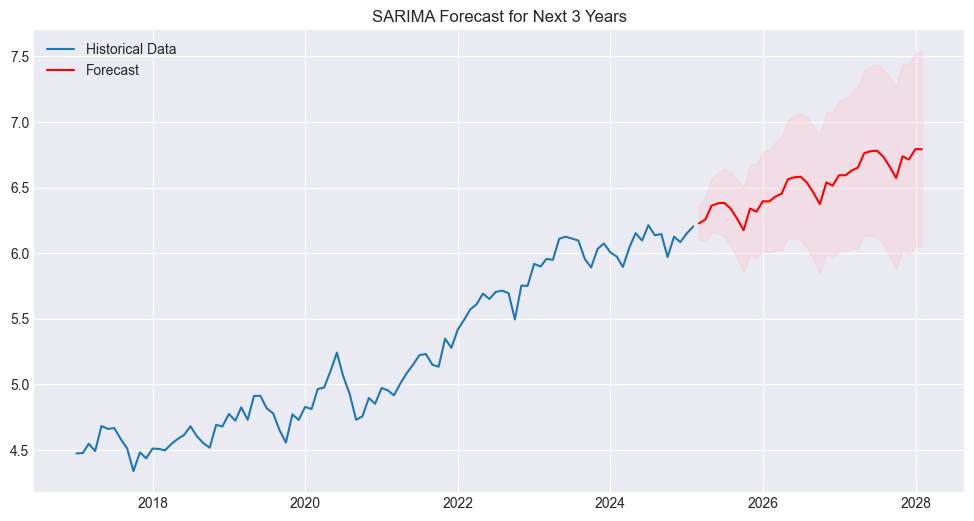

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import gradio as gr

# Example: Assuming df is your full dataset with Date as index
# And 'Overall_AQI' is your target variable

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Use only target column
target = df['Overall Average']  # or 'Average Price'

# Fit SARIMA model
model = SARIMAX(target, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model_fitted = model.fit()

# Forecast next 3 years (36 months)
forecast_steps = 36
forecast = model_fitted.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=target.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='ME')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting
plt.figure(figsize=(12,6))
plt.plot(target, label='Historical Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast for Next 3 Years')
plt.show()


In [253]:
import joblib

# Save the fitted model
joblib.dump(model_fitted, 'sarima_model.pkl')


['sarima_model.pkl']

In [264]:
import pandas as pd

# Load your dataset
df = pd.read_csv("foodprice_data.csv")

# Rename the first column for clarity
df.rename(columns={df.columns[0]: 'Product'}, inplace=True)

# Melt (reshape) the wide format into long format
df_long = df.melt(id_vars='Product', var_name='Date', value_name='Price')

# Convert Date column to datetime
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Preview the reshaped dataframe
df_long.head()


,Product,Date,Price
0,"Beef stewing cuts, per kilogram 4",2017-01-01,12.66
1,"Beef striploin cuts, per kilogram 4",2017-01-01,21.94
2,"Beef top sirloin cuts, per kilogram 4",2017-01-01,13.44
3,"Beef rib cuts, per kilogram 4",2017-01-01,20.17
4,"Ground beef, per kilogram 4",2017-01-01,9.12


In [265]:
# Get list of product names
product_list = df_long['Product'].unique().tolist()

def forecast_price(product, start_date):
    start_date = pd.to_datetime(start_date)
    
    # Extract the selected product's time series
    product_data = df_long[df_long['Product'] == product].dropna()
    product_series = product_data.set_index('Date')['Price'].sort_index()
    
    # Fit SARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(product_series, order=(1,1,1), seasonal_order=(1,0,1,12))
    model_fitted = model.fit(disp=False)

    # Forecasting
    forecast_steps = 36
    forecast = model_fitted.get_forecast(steps=forecast_steps)
    forecast_index = pd.date_range(start=start_date, periods=forecast_steps, freq='MS')
    
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # Format forecast output
    forecast_df = pd.DataFrame({
        'Date': forecast_index,
        'Forecast': forecast_mean.values,
        'Lower CI': forecast_ci.iloc[:, 0].values,
        'Upper CI': forecast_ci.iloc[:, 1].values
    })

    return forecast_df


In [267]:
import gradio as gr

iface = gr.Interface(
    fn=forecast_price,
    inputs=[
        gr.Dropdown(choices=product_list, label="Select Product"),
        gr.Textbox(label="Start Date (YYYY-MM-DD)", value="2025-04-11")
    ],
    outputs="dataframe",
    title="Food Price Forecast (SARIMA)",
    description="Select a product and a start date to view forecasted prices for the next 3 years."
)

iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7867
* Running on public URL: https://abec00aebc4751730e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **Conclusion**

This project provides a comprehensive examination of food price trends, seasonal patterns, and model-based forecasting accuracy from 2017 to 2025. Key insights and implications are summarized as follows:

1. **Long-Term Trend**:  
   Seasonal decomposition revealed a consistent upward trend in food prices, indicating persistent inflationary pressure over the years. The trend component rose from a minimum of 4.523 in 2017 to a maximum of 6.091 in 2025, with an average value of 5.208. The original series mirrored this growth, ranging from 4.33 to 6.21.

2. **Forecasting Model Comparison**:  
   Multiple time series models were evaluated using MSE, MAE, and RMSE. The **Moving Average model** outperformed others (ARIMA, SARIMA, Exponential Smoothing, and Prophet) across all metrics, making it the most reliable for short-term predictions.

3. **Seasonal Patterns**:  
   Clear and consistent seasonal effects were identified, with a stable magnitude of ±0.1 units. These recurring fluctuations suggest predictable price shifts aligned with seasonal demand and supply cycles.

4. **ARIMA vs. SARIMA Performance**:  
   Both ARIMA and SARIMA models yielded identical results (MSE = 0.015860, MAE = 0.100353, RMSE = 0.125938), indicating similar effectiveness. However, they were less accurate than the simpler Moving Average model in this case.

5. **External Influences on Prices**:  
   Residual and trend analysis suggest that the sharp price increase post-2021 may stem from global supply chain disruptions due to the COVID-19 pandemic, inflation, and broader economic instability. Minor residual fluctuations indicate that most variations were well-explained by the trend and seasonal components.

6. **Implications for Stakeholders**:  
   - **Short-term forecasting** using Moving Averages can guide inventory and procurement planning.  
   - **Seasonal awareness** supports more strategic stocking and distribution.  
   - **Rising long-term prices** highlight the need for inflation preparedness by policymakers and businesses.  
   - **Consumers and retailers** can benefit by aligning purchasing and storage decisions with anticipated seasonal trends.

---



## **References:**

1. **Statistics Canada.** (Year). Table 18-10-0245-02: Monthly average retail prices for selected food products. Retrieved from https://www150.statcan.gc.ca/

2. **Box, G. E., & Jenkins, G. M.** (1976). *Time series analysis: Forecasting and control*.

3. **Hyndman, R. J., & Athanasopoulos, G.** (2018). *Forecasting: Principles and Practice*.

4. **Scikit-learn developers.** (n.d.). *Model selection — scikit-learn 0.24.2 documentation*. Retrieved April 11, 2025, from https://scikit-learn.org/stable/model_selection.html

5. **Statistics Canada.** (2022). *Behind the numbers: What’s causing growth in food prices*. Retrieved from https://www150.statcan.gc.ca/n1/pub/62f0014m/62f0014m2022014-eng.htm

